# Installing Libraries

In [ ]:
# from google.colab import files
# !pip install pandas
# !pip install seaborn
# !pip install sklearn
import pandas as pd
from zipfile import ZipFile
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from zipfile import ZipFile
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
# from sklearn.metrics import mean_squared_error
import joblib


# Mounting Drive

drive dataset link: https://drive.google.com/drive/folders/1ph0nUEvHTZ1eZuirE8bd29RRGTDcbT-p?usp=sharing

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# Fetching Data

In [ ]:
df_movies=pd.read_csv('D:/university/6th semester/Project/Recommendation System/Movies Dataset/movies.csv')
df_ratings=pd.read_csv('D:/university/6th semester/Project/Recommendation System/Movies Dataset/ratings.csv')

# Analyzing Attributes

In [ ]:
df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [ ]:
df_ratings

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
25000090,162541,50872,4.5,1240953372
25000091,162541,55768,2.5,1240951998
25000092,162541,56176,2.0,1240950697
25000093,162541,58559,4.0,1240953434


how many movies get discrete ratings

In [ ]:
df_ratings['rating'].value_counts()

4.0    6639798
3.0    4896928
5.0    3612474
3.5    3177318
4.5    2200539
2.0    1640868
2.5    1262797
1.0     776815
1.5     399490
0.5     393068
Name: rating, dtype: int64

average rating b/w 1-4

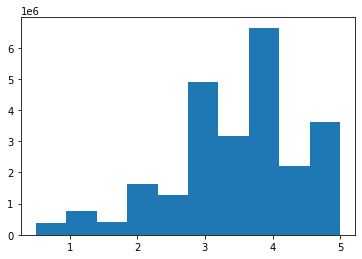

In [ ]:
plt.hist(df_ratings['rating'], bins=10)
plt.show()

In [ ]:
df2=df_movies
df2=df2.merge(df_ratings.groupby('movieId').rating.mean(),on='movieId',how='left') 
df2=df2.merge(df_ratings.groupby('movieId')['userId'].count(),on='movieId',how='left')
df2.rename(columns = {'rating':'mean_rating','userId':'NOU'}, inplace = True)
df2

,movieId,title,genres,mean_rating,NOU
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708,57309.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.251527,24228.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.142028,11804.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.853547,2523.0
4,5,Father of the Bride Part II (1995),Comedy,3.058434,11714.0
...,...,...,...,...,...
62418,209157,We (2018),Drama,1.500000,1.0
62419,209159,Window of the Soul (2001),Documentary,3.000000,1.0
62420,209163,Bad Poems (2018),Comedy|Drama,4.500000,1.0
62421,209169,A Girl Thing (2001),(no genres listed),3.000000,1.0


dropping movies with no genres 



In [ ]:
df2.drop(df2[(df2['genres']=='(no genres listed)')].index,inplace =True)
df2.dropna(inplace=True)
df2
dfc=pd.DataFrame(df2)
dfc

,movieId,title,genres,mean_rating,NOU
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708,57309.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.251527,24228.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.142028,11804.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.853547,2523.0
4,5,Father of the Bride Part II (1995),Comedy,3.058434,11714.0
...,...,...,...,...,...
62417,209155,Santosh Subramaniam (2008),Action|Comedy|Romance,5.000000,1.0
62418,209157,We (2018),Drama,1.500000,1.0
62419,209159,Window of the Soul (2001),Documentary,3.000000,1.0
62420,209163,Bad Poems (2018),Comedy|Drama,4.500000,1.0


In [ ]:
genre_popularity = (df2.genres.str.split('|').explode().value_counts().sort_values(ascending=False))
genre_popularity

Drama          24465
Comedy         16051
Thriller        8330
Romance         7305
Action          6913
Horror          5746
Documentary     5453
Crime           5024
Adventure       3868
SciFi           3502
Animation       2911
Children        2866
Mystery         2782
Fantasy         2667
War             1770
Western         1156
Musical         1017
FilmNoir         349
IMAX             195
Name: genres, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vector = TfidfVectorizer(analyzer='word', ngram_range=(0,1))
tfidf_vector.fit(df2['genres'])
tfidf_vector.get_feature_names_out()

array(['action', 'adventure', 'animation', 'children', 'comedy', 'crime',
       'documentary', 'drama', 'fantasy', 'filmnoir', 'horror', 'imax',
       'musical', 'mystery', 'romance', 'scifi', 'thriller', 'war',
       'western'], dtype=object)

In [ ]:
from itertools import combinations
tfidf = TfidfVectorizer(analyzer=lambda s: (c for i in range(1,20)
                     for c in combinations(s.split('|'), r=1)))
tfidf_matrix = tfidf.fit_transform(df2['genres'])
tfidf_matrix.shape

(54479, 19)

In [ ]:
tfidf_matrix.todense()

matrix([[0.        , 0.45087062, 0.48602104, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.54348065, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.60192123, 0.7159598 , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [ ]:
df2

,movieId,title,genres,mean_rating,NOU
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708,57309.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.251527,24228.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.142028,11804.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.853547,2523.0
4,5,Father of the Bride Part II (1995),Comedy,3.058434,11714.0
...,...,...,...,...,...
62417,209155,Santosh Subramaniam (2008),Action|Comedy|Romance,5.000000,1.0
62418,209157,We (2018),Drama,1.500000,1.0
62419,209159,Window of the Soul (2001),Documentary,3.000000,1.0
62420,209163,Bad Poems (2018),Comedy|Drama,4.500000,1.0


In [ ]:
df2_tfidf=pd.DataFrame(tfidf_matrix.todense(), columns=tfidf.get_feature_names_out(), index=df2.movieId).sample(genre_popularity.nunique(), axis=1).sample(df2['genres'].count(), axis=0)
df2_tfidf=df2_tfidf.reset_index()
df2_tfidf

,movieId,"(Documentary,)","(IMAX,)","(Drama,)","(Adventure,)","(Horror,)","(Fantasy,)","(War,)","(Animation,)","(Action,)","(Comedy,)","(Romance,)","(Crime,)","(Thriller,)","(Mystery,)","(Western,)","(Children,)","(SciFi,)","(FilmNoir,)","(Musical,)"
0,6044,0.0,0.0,0.000000,0.0,0.748585,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.663039,0.000000,0.0,0.0,0.0,0.0,0.0
1,87316,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,147398,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,98842,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,140737,0.0,0.0,0.000000,0.0,0.000000,0.624860,0.0,0.0,0.476720,0.000000,0.0,0.0,0.000000,0.618295,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54474,26574,0.0,0.0,0.629576,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.776939,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
54475,160864,0.0,0.0,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
54476,102109,0.0,0.0,0.365173,0.0,0.000000,0.814595,0.0,0.0,0.000000,0.450648,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
54477,116702,0.0,0.0,0.506608,0.0,0.000000,0.000000,0.0,0.0,0.862177,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
df2_tfidf=df2_tfidf.merge(df2,on='movieId',how='right')

In [ ]:
df2_tfidf

,movieId,"(Documentary,)","(IMAX,)","(Drama,)","(Adventure,)","(Horror,)","(Fantasy,)","(War,)","(Animation,)","(Action,)",...,"(Mystery,)","(Western,)","(Children,)","(SciFi,)","(FilmNoir,)","(Musical,)",title,genres,mean_rating,NOU
0,1,0.0,0.0,0.000000,0.450871,0.0,0.496846,0.0,0.486021,0.000000,...,0.0,0.0,0.487948,0.0,0.0,0.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708,57309.0
1,2,0.0,0.0,0.000000,0.543481,0.0,0.598900,0.0,0.000000,0.000000,...,0.0,0.0,0.588173,0.0,0.0,0.0,Jumanji (1995),Adventure|Children|Fantasy,3.251527,24228.0
2,3,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,Grumpier Old Men (1995),Comedy|Romance,3.142028,11804.0
3,4,0.0,0.0,0.433720,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,Waiting to Exhale (1995),Comedy|Drama|Romance,2.853547,2523.0
4,5,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,Father of the Bride Part II (1995),Comedy,3.058434,11714.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54474,209155,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.633706,...,0.0,0.0,0.000000,0.0,0.0,0.0,Santosh Subramaniam (2008),Action|Comedy|Romance,5.000000,1.0
54475,209157,0.0,0.0,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,We (2018),Drama,1.500000,1.0
54476,209159,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,Window of the Soul (2001),Documentary,3.000000,1.0
54477,209163,0.0,0.0,0.629576,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,Bad Poems (2018),Comedy|Drama,4.500000,1.0


In [ ]:
#df2_tfidf.drop("title_y", axis=1, inplace=True)
#df2_tfidf.drop("genres_y", axis=1, inplace=True)
# df2_tfidf.drop("mean_rating_y", axis=1, inplace=True)
#df2_tfidf.drop("NOU_y", axis=1, inplace=True)
#df2_tfidf.drop("title_x", axis=1, inplace=True)
#df2_tfidf.drop("genres_x", axis=1, inplace=True)
#df2_tfidf.drop("mean_rating_x", axis=1, inplace=True)
#df2_tfidf.drop("NOU_x", axis=1, inplace=True)
df2_tfidf

,movieId,"(Documentary,)","(IMAX,)","(Drama,)","(Adventure,)","(Horror,)","(Fantasy,)","(War,)","(Animation,)","(Action,)",...,"(Mystery,)","(Western,)","(Children,)","(SciFi,)","(FilmNoir,)","(Musical,)",title,genres,mean_rating,NOU
0,1,0.0,0.0,0.000000,0.450871,0.0,0.496846,0.0,0.486021,0.000000,...,0.0,0.0,0.487948,0.0,0.0,0.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708,57309.0
1,2,0.0,0.0,0.000000,0.543481,0.0,0.598900,0.0,0.000000,0.000000,...,0.0,0.0,0.588173,0.0,0.0,0.0,Jumanji (1995),Adventure|Children|Fantasy,3.251527,24228.0
2,3,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,Grumpier Old Men (1995),Comedy|Romance,3.142028,11804.0
3,4,0.0,0.0,0.433720,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,Waiting to Exhale (1995),Comedy|Drama|Romance,2.853547,2523.0
4,5,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,Father of the Bride Part II (1995),Comedy,3.058434,11714.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54474,209155,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.633706,...,0.0,0.0,0.000000,0.0,0.0,0.0,Santosh Subramaniam (2008),Action|Comedy|Romance,5.000000,1.0
54475,209157,0.0,0.0,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,We (2018),Drama,1.500000,1.0
54476,209159,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,Window of the Soul (2001),Documentary,3.000000,1.0
54477,209163,0.0,0.0,0.629576,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,Bad Poems (2018),Comedy|Drama,4.500000,1.0


In [ ]:
# from sklearn.preprocessing import StandardScaler
# df2_tfidf_ss=df2_tfidf.copy()
# scaler = StandardScaler()
# df2_tfidf_ss[['mean_rating','NOU']] = scaler.fit_transform(df2_tfidf_ss[['mean_rating', 'NOU']])
# df2_tfidf_ss['ratXusers'] = df2_tfidf_ss['mean_rating'] * df2_tfidf_ss['NOU']
# df2_tfidf_ss.drop("mean_rating", axis=1, inplace=True)
# df2_tfidf_ss.drop("NOU", axis=1, inplace=True)
# df2_tfidf_ss.drop("genres", axis=1, inplace=True)
# df2_tfidf_ss

In [ ]:
# df2_tfidf.head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
df2_tfidf_mm=df2_tfidf.copy()
df2_tfidf_mm[['mean_ratingMM','NOU_MM']] = MinMaxScaler().fit_transform(df2_tfidf_mm[['mean_rating', 'NOU']])
df2_tfidf_mm['ratXusersMM'] = df2_tfidf_mm['mean_ratingMM'] * df2_tfidf_mm['NOU_MM']
df2_tfidf_mm.drop("mean_ratingMM", axis=1, inplace=True)
df2_tfidf_mm.drop("NOU_MM", axis=1, inplace=True)
df2_tfidf_mm.drop("mean_rating", axis=1, inplace=True)
df2_tfidf_mm.drop("NOU", axis=1, inplace=True)
dfx=df2_tfidf_mm
df2_tfidf_mm.drop("genres", axis=1, inplace=True)
# df=df2_tfidf_mm

In [ ]:
from sklearn.preprocessing import MinMaxScaler
dfc_mm=dfc.copy()
dfc_mm[['mean_ratingMM','NOU_MM']] = MinMaxScaler().fit_transform(dfc_mm[['mean_rating', 'NOU']])
dfc_mm['ratXusersMM'] = dfc_mm['mean_ratingMM'] * dfc_mm['NOU_MM']
dfc_mm.drop("mean_ratingMM", axis=1, inplace=True)
dfc_mm.drop("NOU_MM", axis=1, inplace=True)
dfc_mm.drop("mean_rating", axis=1, inplace=True)
dfc_mm.drop("NOU", axis=1, inplace=True)
dfc_mm.drop("genres", axis=1, inplace=True)
# df=df2_tfidf_mm
# dfc_mm.reset_index
# dfc_mm.drop("index", axis=1, inplace=True)
dfc_mm

,movieId,title,ratXusersMM
0,1,Toy Story (1995),0.530363
1,2,Jumanji (1995),0.181784
2,3,Grumpier Old Men (1995),0.085038
3,4,Waiting to Exhale (1995),0.016186
4,5,Father of the Bride Part II (1995),0.081719
...,...,...,...
62417,209155,Santosh Subramaniam (2008),0.000000
62418,209157,We (2018),0.000000
62419,209159,Window of the Soul (2001),0.000000
62420,209163,Bad Poems (2018),0.000000


In [ ]:
df2_tfidf_mm

,movieId,"(Documentary,)","(IMAX,)","(Drama,)","(Adventure,)","(Horror,)","(Fantasy,)","(War,)","(Animation,)","(Action,)",...,"(Crime,)","(Thriller,)","(Mystery,)","(Western,)","(Children,)","(SciFi,)","(FilmNoir,)","(Musical,)",title,ratXusersMM
0,1,0.0,0.0,0.000000,0.450871,0.0,0.496846,0.0,0.486021,0.000000,...,0.0,0.0,0.0,0.0,0.487948,0.0,0.0,0.0,Toy Story (1995),0.530363
1,2,0.0,0.0,0.000000,0.543481,0.0,0.598900,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.588173,0.0,0.0,0.0,Jumanji (1995),0.181784
2,3,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,Grumpier Old Men (1995),0.085038
3,4,0.0,0.0,0.433720,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,Waiting to Exhale (1995),0.016186
4,5,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,Father of the Bride Part II (1995),0.081719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54474,209155,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.633706,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,Santosh Subramaniam (2008),0.000000
54475,209157,0.0,0.0,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,We (2018),0.000000
54476,209159,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,Window of the Soul (2001),0.000000
54477,209163,0.0,0.0,0.629576,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,Bad Poems (2018),0.000000


In [ ]:
# df2_tfidf_mm.drop("mean_rating", axis=1, inplace=True)
# df2_tfidf_mm.drop("NOU", axis=1, inplace=True)

In [ ]:
df2_tfidf_mm

,movieId,"(Documentary,)","(IMAX,)","(Drama,)","(Adventure,)","(Horror,)","(Fantasy,)","(War,)","(Animation,)","(Action,)",...,"(Crime,)","(Thriller,)","(Mystery,)","(Western,)","(Children,)","(SciFi,)","(FilmNoir,)","(Musical,)",title,ratXusersMM
0,1,0.0,0.0,0.000000,0.450871,0.0,0.496846,0.0,0.486021,0.000000,...,0.0,0.0,0.0,0.0,0.487948,0.0,0.0,0.0,Toy Story (1995),0.530363
1,2,0.0,0.0,0.000000,0.543481,0.0,0.598900,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.588173,0.0,0.0,0.0,Jumanji (1995),0.181784
2,3,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,Grumpier Old Men (1995),0.085038
3,4,0.0,0.0,0.433720,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,Waiting to Exhale (1995),0.016186
4,5,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,Father of the Bride Part II (1995),0.081719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54474,209155,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.633706,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,Santosh Subramaniam (2008),0.000000
54475,209157,0.0,0.0,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,We (2018),0.000000
54476,209159,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,Window of the Soul (2001),0.000000
54477,209163,0.0,0.0,0.629576,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,Bad Poems (2018),0.000000


In [ ]:
# df2_OHE=df2.copy()
# # df2_OHE['genres'] = df2_OHE['genres'].str.split('|')
# df2_OHE_genres = pd.get_dummies(pd.DataFrame(df2_OHE['genres'].tolist()).stack()).sum(level=0)
# df2_OHE_genres

In [ ]:
# df2_OHE.reset_index(inplace=True)
# df2_OHEE=df2_OHE.join(df2_OHE_genres)
# df2_OHEE.drop("genres", axis=1, inplace=True)
# df2_OHEE.drop("index", axis=1, inplace=True)
# df2_OHEE

In [ ]:
# from sklearn.preprocessing import StandardScaler
# df2_OHEE_ss=df2_OHEE.copy()
# scaler = StandardScaler()
# df2_OHEE_ss[['mean_rating','NOU']] = scaler.fit_transform(df2_OHEE_ss[['mean_rating', 'NOU']])
# df2_OHEE_ss['ratXusers'] = df2_OHEE_ss['mean_rating'] * df2_OHEE_ss['NOU']
# df2_OHEE_ss.drop("mean_rating", axis=1, inplace=True)
# df2_OHEE_ss.drop("NOU", axis=1, inplace=True)
# df2_OHEE_ss

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# df2_OHEE_mm=df2_OHEE.copy()
# df2_OHEE_mm[['mean_ratingMM','NOU_MM']] = MinMaxScaler().fit_transform(df2_OHEE_mm[['mean_rating', 'NOU']])
# df2_OHEE_mm['ratXusersMM'] = df2_OHEE_mm['mean_ratingMM'] * df2_OHEE_mm['NOU_MM']
# df2_OHEE_mm.drop("mean_ratingMM", axis=1, inplace=True)
# df2_OHEE_mm.drop("NOU_MM", axis=1, inplace=True)
# df2_OHEE_mm.drop("mean_rating", axis=1, inplace=True)
# df2_OHEE_mm.drop("NOU", axis=1, inplace=True)
# df2_OHEE_mm

In [ ]:
df2.reset_index(inplace=True)
df2.drop('index',axis =1)
df2

,index,movieId,title,genres,mean_rating,NOU
0,0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708,57309.0
1,1,2,Jumanji (1995),Adventure|Children|Fantasy,3.251527,24228.0
2,2,3,Grumpier Old Men (1995),Comedy|Romance,3.142028,11804.0
3,3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.853547,2523.0
4,4,5,Father of the Bride Part II (1995),Comedy,3.058434,11714.0
...,...,...,...,...,...,...
54474,62417,209155,Santosh Subramaniam (2008),Action|Comedy|Romance,5.000000,1.0
54475,62418,209157,We (2018),Drama,1.500000,1.0
54476,62419,209159,Window of the Soul (2001),Documentary,3.000000,1.0
54477,62420,209163,Bad Poems (2018),Comedy|Drama,4.500000,1.0


In [ ]:
df2

,index,movieId,title,genres,mean_rating,NOU
0,0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708,57309.0
1,1,2,Jumanji (1995),Adventure|Children|Fantasy,3.251527,24228.0
2,2,3,Grumpier Old Men (1995),Comedy|Romance,3.142028,11804.0
3,3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.853547,2523.0
4,4,5,Father of the Bride Part II (1995),Comedy,3.058434,11714.0
...,...,...,...,...,...,...
54474,62417,209155,Santosh Subramaniam (2008),Action|Comedy|Romance,5.000000,1.0
54475,62418,209157,We (2018),Drama,1.500000,1.0
54476,62419,209159,Window of the Soul (2001),Documentary,3.000000,1.0
54477,62420,209163,Bad Poems (2018),Comedy|Drama,4.500000,1.0


In [ ]:
# df2.reset_index(inplace=True)
df_USE=df2.copy()
# df_USE.drop('index',axis =1)
# df_USE.drop('level_0',axis =1)

In [ ]:
df_USE

,index,movieId,title,genres,mean_rating,NOU
0,0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708,57309.0
1,1,2,Jumanji (1995),Adventure|Children|Fantasy,3.251527,24228.0
2,2,3,Grumpier Old Men (1995),Comedy|Romance,3.142028,11804.0
3,3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.853547,2523.0
4,4,5,Father of the Bride Part II (1995),Comedy,3.058434,11714.0
...,...,...,...,...,...,...
54474,62417,209155,Santosh Subramaniam (2008),Action|Comedy|Romance,5.000000,1.0
54475,62418,209157,We (2018),Drama,1.500000,1.0
54476,62419,209159,Window of the Soul (2001),Documentary,3.000000,1.0
54477,62420,209163,Bad Poems (2018),Comedy|Drama,4.500000,1.0


In [ ]:
df_use=pd.DataFrame(df_USE[['movieId','title','genres','mean_rating','NOU']])

In [ ]:
df_use

,movieId,title,genres,mean_rating,NOU
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708,57309.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.251527,24228.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.142028,11804.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.853547,2523.0
4,5,Father of the Bride Part II (1995),Comedy,3.058434,11714.0
...,...,...,...,...,...
54474,209155,Santosh Subramaniam (2008),Action|Comedy|Romance,5.000000,1.0
54475,209157,We (2018),Drama,1.500000,1.0
54476,209159,Window of the Soul (2001),Documentary,3.000000,1.0
54477,209163,Bad Poems (2018),Comedy|Drama,4.500000,1.0


In [ ]:
# !pip install fasttext
import fasttext
# !pip install flask-ngrok
from flask import Flask
from flask_ngrok import run_with_ngrok
from flask import request

In [ ]:
import re
def transform(string):
    return re.sub(r"[^a-zA-Z0-9 ]","",string)


In [ ]:
df_FT_transformed = df_USE['title'].apply(transform)
df_FT_transformed

0                          Toy Story 1995
1                            Jumanji 1995
2                   Grumpier Old Men 1995
3                  Waiting to Exhale 1995
4        Father of the Bride Part II 1995
                       ...               
54474            Santosh Subramaniam 2008
54475                             We 2018
54476             Window of the Soul 2001
54477                      Bad Poems 2018
54478         Women of Devils Island 1962
Name: title, Length: 54479, dtype: object

In [ ]:
dim_shape = 250

model training

In [ ]:
# pd.DataFrame(df_FT_transformed).to_csv('D:/university/6th semester/Project/Recommendation System/Movies Dataset/df_FT_transformed.csv', index=False)
# fasttext_model=fasttext.train_unsupervised('D:/university/6th semester/Project/Recommendation System/Movies Dataset/df_FT_transformed.csv', dim=dim_shape)
# fasttext_model.save_model('D:/university/6th semester/Project/Recommendation System/Movies Dataset/fasttext.bin')

In [ ]:
fasttext_model = fasttext.load_model('D:/university/6th semester/Project/Recommendation System/Movies Dataset/fasttext.bin')

In [ ]:
def name_emb(name):
    emb = [fasttext_model.get_word_vector(x) for x in name.split(' ')]
    return np.mean(emb, axis=0)

In [ ]:
df_FT = df_FT_transformed.apply(name_emb)
feat_data = pd.DataFrame(df_FT.values.tolist(), columns=[f"feat_{i}" for i in range(dim_shape)])
df = pd.concat([df_FT_transformed, feat_data], axis=1).drop(columns=['title'])
df

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_240,feat_241,feat_242,feat_243,feat_244,feat_245,feat_246,feat_247,feat_248,feat_249
0,0.059930,-0.054355,0.102885,0.052418,-0.075304,0.158293,0.194966,0.048404,-0.073553,0.029224,...,-0.295930,-0.023093,0.111211,0.056209,0.219095,-0.096919,0.026263,0.176613,0.132722,0.232069
1,0.088513,-0.076769,0.146810,0.046498,-0.116391,0.093448,0.115012,0.002349,-0.138837,-0.022118,...,-0.230392,-0.070316,0.073955,0.002405,0.158478,-0.103095,-0.024618,0.071116,0.083625,0.183144
2,0.035739,-0.047706,0.056875,0.056142,-0.034986,0.164850,0.181130,0.079659,-0.018066,0.043716,...,-0.265038,-0.008173,0.101655,0.086963,0.209204,-0.086351,0.048035,0.185520,0.131423,0.203185
3,0.032311,-0.052658,0.050309,0.063391,-0.028375,0.176778,0.176896,0.093231,-0.008980,0.044466,...,-0.265511,-0.013757,0.100718,0.100776,0.213940,-0.092080,0.055027,0.189089,0.135657,0.202449
4,0.032407,-0.025686,0.066854,0.042854,-0.043663,0.162668,0.225392,0.053750,-0.026845,0.059881,...,-0.287006,0.018759,0.119365,0.059029,0.218540,-0.074640,0.048775,0.216082,0.144483,0.226672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54474,0.041632,-0.052303,0.070355,0.048239,-0.047224,0.130381,0.145771,0.056435,-0.043386,0.022595,...,-0.229176,-0.022122,0.084341,0.065616,0.173671,-0.081612,0.030055,0.138943,0.107663,0.176305
54475,0.042864,-0.096939,0.036234,0.102932,-0.005743,0.235017,0.167445,0.159137,0.019531,0.049756,...,-0.303698,-0.046375,0.105477,0.183956,0.255891,-0.126426,0.089421,0.205133,0.155516,0.222352
54476,0.040063,-0.032452,0.077958,0.044582,-0.050165,0.157242,0.207782,0.051643,-0.040825,0.051110,...,-0.281895,0.005528,0.114903,0.057445,0.212816,-0.078331,0.043089,0.197624,0.137428,0.221630
54477,0.041955,-0.056660,0.070238,0.053853,-0.044211,0.141983,0.151257,0.066010,-0.038600,0.026311,...,-0.241038,-0.022973,0.087115,0.074479,0.183143,-0.086447,0.036726,0.148785,0.116106,0.186236


In [ ]:
df2_tfidf_mm=df2_tfidf_mm.join(df)
# df2_tfidf_ss=df2_tfidf_ss.join(df)
# df2_OHEE_mm=df2_OHEE_mm.join(df)
# df2_OHEE_ss=df2_OHEE_ss.join(df)

In [ ]:
df2_tfidf_mm

,movieId,"(Documentary,)","(IMAX,)","(Drama,)","(Adventure,)","(Horror,)","(Fantasy,)","(War,)","(Animation,)","(Action,)",...,feat_240,feat_241,feat_242,feat_243,feat_244,feat_245,feat_246,feat_247,feat_248,feat_249
0,1,0.0,0.0,0.000000,0.450871,0.0,0.496846,0.0,0.486021,0.000000,...,-0.295930,-0.023093,0.111211,0.056209,0.219095,-0.096919,0.026263,0.176613,0.132722,0.232069
1,2,0.0,0.0,0.000000,0.543481,0.0,0.598900,0.0,0.000000,0.000000,...,-0.230392,-0.070316,0.073955,0.002405,0.158478,-0.103095,-0.024618,0.071116,0.083625,0.183144
2,3,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,-0.265038,-0.008173,0.101655,0.086963,0.209204,-0.086351,0.048035,0.185520,0.131423,0.203185
3,4,0.0,0.0,0.433720,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,-0.265511,-0.013757,0.100718,0.100776,0.213940,-0.092080,0.055027,0.189089,0.135657,0.202449
4,5,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,-0.287006,0.018759,0.119365,0.059029,0.218540,-0.074640,0.048775,0.216082,0.144483,0.226672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54474,209155,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.633706,...,-0.229176,-0.022122,0.084341,0.065616,0.173671,-0.081612,0.030055,0.138943,0.107663,0.176305
54475,209157,0.0,0.0,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,-0.303698,-0.046375,0.105477,0.183956,0.255891,-0.126426,0.089421,0.205133,0.155516,0.222352
54476,209159,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,-0.281895,0.005528,0.114903,0.057445,0.212816,-0.078331,0.043089,0.197624,0.137428,0.221630
54477,209163,0.0,0.0,0.629576,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,-0.241038,-0.022973,0.087115,0.074479,0.183143,-0.086447,0.036726,0.148785,0.116106,0.186236


In [ ]:
df2_tfidf_mm=df2_tfidf_mm.drop('title',axis=1)
# df2_tfidf_ss=df2_tfidf_ss.drop('title',axis=1)
# df2_OHEE_mm=df2_OHEE_mm.drop('title',axis=1)
# df2_OHEE_ss=df2_OHEE_ss.drop('title',axis=1)

In [ ]:
dfx

,movieId,"(Documentary,)","(IMAX,)","(Drama,)","(Adventure,)","(Horror,)","(Fantasy,)","(War,)","(Animation,)","(Action,)",...,"(Crime,)","(Thriller,)","(Mystery,)","(Western,)","(Children,)","(SciFi,)","(FilmNoir,)","(Musical,)",title,ratXusersMM
0,1,0.0,0.0,0.000000,0.450871,0.0,0.496846,0.0,0.486021,0.000000,...,0.0,0.0,0.0,0.0,0.487948,0.0,0.0,0.0,Toy Story (1995),0.530363
1,2,0.0,0.0,0.000000,0.543481,0.0,0.598900,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.588173,0.0,0.0,0.0,Jumanji (1995),0.181784
2,3,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,Grumpier Old Men (1995),0.085038
3,4,0.0,0.0,0.433720,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,Waiting to Exhale (1995),0.016186
4,5,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,Father of the Bride Part II (1995),0.081719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54474,209155,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.633706,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,Santosh Subramaniam (2008),0.000000
54475,209157,0.0,0.0,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,We (2018),0.000000
54476,209159,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,Window of the Soul (2001),0.000000
54477,209163,0.0,0.0,0.629576,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,Bad Poems (2018),0.000000


In [ ]:
# messages = df_USE['title']

In [ ]:
# messages

In [ ]:
# def create_keras_model():
#   return tf.keras.models.Sequential([
#     hub.KerasLayer(encoder, input_shape=[],dtype=tf.string,trainable=True)]) 

In [ ]:
# with tf.compat.v1.Session() as session:
#     session.run([tf.global_variables_initializer(),tf.tables_initializer()])
#     # training_embeddings = session.run(embed(messages.to_list()))

In [ ]:
# a=pd.DataFrame(training_embeddings)

In [ ]:
# a 

In [ ]:
# df2_tfidf_mm

In [ ]:
# df2_tfidf_mm_USE=df2_tfidf_mm.join(a)
# df2_tfidf_ss_USE=df2_tfidf_ss.join(a)
# df2_OHEE_mm_USE=df2_OHEE_mm.join(a)
# df2_OHEE_ss_USE=df2_OHEE_ss.join(a)

In [ ]:
# # df2_tfidf_mm_USE=df2_tfidf_mm.drop('title',axis=1)
# df2_tfidf_ss_USE=df2_tfidf_ss.drop('title',axis=1)
# df2_OHEE_mm_USE=df2_OHEE_mm.drop('title',axis=1)
# df2_OHEE_ss_USE=df2_OHEE_ss.drop('title',axis=1)

In [ ]:
# df2_OHEE_mm_USE['fest0']

In [ ]:
df2

,index,movieId,title,genres,mean_rating,NOU
0,0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708,57309.0
1,1,2,Jumanji (1995),Adventure|Children|Fantasy,3.251527,24228.0
2,2,3,Grumpier Old Men (1995),Comedy|Romance,3.142028,11804.0
3,3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.853547,2523.0
4,4,5,Father of the Bride Part II (1995),Comedy,3.058434,11714.0
...,...,...,...,...,...,...
54474,62417,209155,Santosh Subramaniam (2008),Action|Comedy|Romance,5.000000,1.0
54475,62418,209157,We (2018),Drama,1.500000,1.0
54476,62419,209159,Window of the Soul (2001),Documentary,3.000000,1.0
54477,62420,209163,Bad Poems (2018),Comedy|Drama,4.500000,1.0


In [ ]:
df_copy=dfx.copy()

In [ ]:
df_copy

,movieId,"(Documentary,)","(IMAX,)","(Drama,)","(Adventure,)","(Horror,)","(Fantasy,)","(War,)","(Animation,)","(Action,)",...,"(Crime,)","(Thriller,)","(Mystery,)","(Western,)","(Children,)","(SciFi,)","(FilmNoir,)","(Musical,)",title,ratXusersMM
0,1,0.0,0.0,0.000000,0.450871,0.0,0.496846,0.0,0.486021,0.000000,...,0.0,0.0,0.0,0.0,0.487948,0.0,0.0,0.0,Toy Story (1995),0.530363
1,2,0.0,0.0,0.000000,0.543481,0.0,0.598900,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.588173,0.0,0.0,0.0,Jumanji (1995),0.181784
2,3,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,Grumpier Old Men (1995),0.085038
3,4,0.0,0.0,0.433720,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,Waiting to Exhale (1995),0.016186
4,5,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,Father of the Bride Part II (1995),0.081719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54474,209155,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.633706,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,Santosh Subramaniam (2008),0.000000
54475,209157,0.0,0.0,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,We (2018),0.000000
54476,209159,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,Window of the Soul (2001),0.000000
54477,209163,0.0,0.0,0.629576,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,Bad Poems (2018),0.000000


In [ ]:
movieid2index = dict(zip(df_copy['movieId'], list(range(df_copy.shape[0]))))
index2movieid = dict(zip(movieid2index.values(), movieid2index.keys()))

movieid2title = dict(zip(df_copy['movieId'], df_copy['title']))
title2movieid = dict(zip(df_copy['title'], df_copy['movieId']))

In [ ]:
movieid2ratXusersMM = dict(zip(df_copy['movieId'], df_copy['ratXusersMM']))

#Content based filtering

In [ ]:
def get_id_name_rating(index):
    movieId = index2movieid[index]
    title = movieid2title[movieId]
    ratXusersMM = movieid2ratXusersMM[movieId]
    return movieId, title, ratXusersMM

In [ ]:
def get_similar_movies(index):
    movies = pd.DataFrame()
    movies = content_based(index)
    return movies

In [ ]:
df2_tfidf_mm.columns

Index([       'movieId', ('Documentary',),        ('IMAX',),       ('Drama',),
         ('Adventure',),      ('Horror',),     ('Fantasy',),         ('War',),
         ('Animation',),      ('Action',),
       ...
             'feat_240',       'feat_241',       'feat_242',       'feat_243',
             'feat_244',       'feat_245',       'feat_246',       'feat_247',
             'feat_248',       'feat_249'],
      dtype='object', length=271)

In [ ]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(metric='cosine',algorithm='brute', n_jobs=-1)
model.fit(df2_tfidf_mm)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1)

In [ ]:
def content_based(index):
  query_index=index
  distances,indices=model.kneighbors(df2_tfidf_mm.iloc[query_index,:].values.reshape(1,-1),n_neighbors=11)
  # print("Distances -->",distances," Indices -->",indices)
  ind=indices.flatten()
  print(ind)
  j=pd.DataFrame()
  for i in range(0,len(ind)):
    j[i]=pd.Series(get_id_name_rating(ind[i]))
    c=pd.DataFrame(j)
  c=c.transpose()
  c.rename(columns={0:'movieId',1:'title',2:'ratXusersMM'},inplace=True)
  return ind

In [ ]:
def cold_start_solution():
  dfc_mm.reset_index(inplace=True)
  dfc_mm
  dfc_mm.drop('index',axis=1,inplace=True)
  df_cold=pd.DataFrame(dfc_mm)
  df_cold['Year'] = df_cold['title'].str.extract('.*\((.*)\).*',expand = False)
  z=df_cold[df_cold['Year']=='2018']
  x=z['ratXusersMM'].sort_values(ascending=False).head(10)
  x=pd.DataFrame(x)
  x.reset_index(inplace=True)
  ind=x['index']
  j=pd.DataFrame()
  for i in range(0,len(ind)):
    j[i]=pd.Series(get_id_name_rating(ind[i]))
  c=pd.DataFrame(j)
  c=c.transpose()
  c.rename(columns={0:'movieId',1:'title',2:'ratXusersMM'},inplace=True)
  return c

In [ ]:
dfc_mm

,movieId,title,ratXusersMM
0,1,Toy Story (1995),0.530363
1,2,Jumanji (1995),0.181784
2,3,Grumpier Old Men (1995),0.085038
3,4,Waiting to Exhale (1995),0.016186
4,5,Father of the Bride Part II (1995),0.081719
...,...,...,...
62417,209155,Santosh Subramaniam (2008),0.000000
62418,209157,We (2018),0.000000
62419,209159,Window of the Soul (2001),0.000000
62420,209163,Bad Poems (2018),0.000000


In [ ]:
c=pd.DataFrame()
# i=0
c=content_based(16)
c

[16 24 27 34 14 25 30 19 26 23 32]


array([16, 24, 27, 34, 14, 25, 30, 19, 26, 23, 32], dtype=int64)

In [ ]:
cold_start_solution()

,movieId,title,ratXusersMM
0,122912,Avengers: Infinity War - Part I (2018),0.056013
1,187593,Deadpool 2 (2018),0.038018
2,195159,Spider-Man: Into the Spider-Verse (2018),0.030372
3,187541,Incredibles 2 (2018),0.025063
4,185029,A Quiet Place (2018),0.02007
5,183897,Isle of Dogs (2018),0.019198
6,192803,Bohemian Rhapsody (2018),0.01891
7,194448,Green Book (2018),0.0185
8,182715,Annihilation (2018),0.01685
9,188301,Ant-Man and the Wasp (2018),0.015272


In [ ]:
c

array([16, 24, 27, 34, 14, 25, 30, 19, 26, 23, 32], dtype=int64)

In [ ]:
# cos_sin = cosine_similarity(df2_tfidf_mm)

In [ ]:
# cos_sin.shape

In [ ]:
# cos_sin1 = cosine_similarity(df2_tfidf_mm.head(25000))

In [ ]:
# c1=pd.DataFrame(cos_sin)
# c2=pd.DataFrame(cos_sin1)

In [ ]:
# cos_sin

#collaborative filtering

In [ ]:
pd.isnull(df_ratings).sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [ ]:
df_ratings

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
25000090,162541,50872,4.5,1240953372
25000091,162541,55768,2.5,1240951998
25000092,162541,56176,2.0,1240950697
25000093,162541,58559,4.0,1240953434


In [ ]:
def get_top_movies_for_user(userId):
  movies = pd.DataFrame()
      
  movie_ids = df_ratings.loc[df_ratings['userId'] == userId].sort_values('rating', ascending=False)['movieId'].values

  if len(movie_ids) < 1:
    return cold_start_solution()

  watched_movies = movie_ids.copy()

  if len(movie_ids) > 10:
    movie_id = movie_ids[:10]
  else:
    movie_id = movie_ids

  for my_movie_id in movie_id:
    movies=movies.append((get_similar_movies(movieid2index[my_movie_id])))
  movies_df = pd.DataFrame(movies)
  movies_df.rename(columns={0:'movieId', 1:'title',2:'ratXusersMM'},inplace=True)
  # movies_df
  movie=pd.DataFrame()
  movie['userId'] = userId
  movies_df.join(movie)
  movies_df = movies_df[movies_df['movieId'].isin(watched_movies)]
  movies_df = movies_df.drop_duplicates()
  return movies_df

recommendation

In [ ]:
user_id = 162541
Result = get_top_movies_for_user(user_id)

print(Result)

cold start

In [ ]:
user_id = 162542
Result = get_top_movies_for_user(user_id)

print(Result)